In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog
import matplotlib.pyplot as plt

import sys
sys.path.append("./../app")
import nordpool

In [2]:
from datetime import datetime
prices = nordpool.fetch_nordpool_data("SN3")["Value"]
prices

13    13.39
14    12.21
15    12.01
16    12.50
17    13.90
18    14.32
19    14.01
20    12.06
21    11.60
22     9.21
23     3.45
Name: Value, dtype: float64

In [3]:
no_of_variables = len(prices)

bounds = [(-0.5, 0.5)]*no_of_variables

# Lower temperature limits
A_ub = -1 * np.tri(no_of_variables)
b_ub = (19 - np.array([17]*no_of_variables))
b_ub[-1] = 0

A_ub = np.concatenate([A_ub, np.tri(no_of_variables)])
b_ub = np.concatenate([b_ub, -1*(19 - np.array([22]*no_of_variables))])
b_ub[-1] = 0

print(A_ub)
print(b_ub)



res = linprog(prices, A_ub=A_ub, b_ub=b_ub, bounds=bounds)
print(res)

[[-1. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-1. -1. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-1. -1. -1. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-1. -1. -1. -1. -0. -0. -0. -0. -0. -0. -0.]
 [-1. -1. -1. -1. -1. -0. -0. -0. -0. -0. -0.]
 [-1. -1. -1. -1. -1. -1. -0. -0. -0. -0. -0.]
 [-1. -1. -1. -1. -1. -1. -1. -0. -0. -0. -0.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -0. -0. -0.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -0. -0.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -0.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.

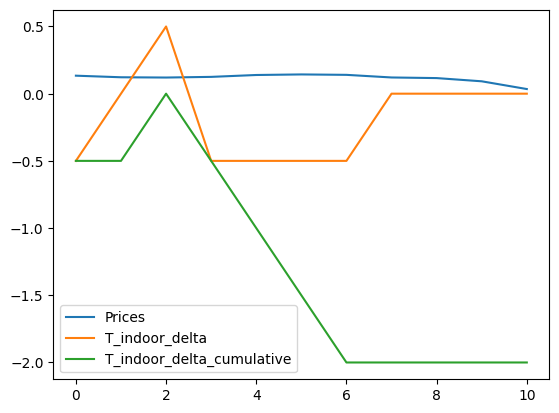

In [8]:
plt.plot(prices.array/100, label="Prices")
plt.plot(res.x, label="T_indoor_delta")
plt.plot(res.x.cumsum(), label="T_indoor_delta_cumulative")
plt.legend()